In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [17]:
# Load embeddings and dataset paths
df_embeddings_train = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/vindr-pcxr/train_embeddings.csv")
df_embeddings_val = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/vindr-pcxr/val_embeddings.csv")
df_embeddings_test = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/vindr-pcxr/test_embeddings.csv")

df_train = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/vindr-pcxr/train_vindr.csv").rename(columns={"image_id": "Path"})
df_val = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/vindr-pcxr/val_vindr.csv").rename(columns={"image_id": "Path"})
df_test = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/vindr-pcxr/test_vindr.csv").rename(columns={"image_id": "Path"})

# Update Paths
df_train["Path"] = df_train["Path"].apply(lambda x: f"vindr-pcxr/1.0.0/train/{x}.jpg")
df_val["Path"] = df_val["Path"].apply(lambda x: f"vindr-pcxr/1.0.0/train/{x}.jpg")
df_test["Path"] = df_test["Path"].apply(lambda x: f"vindr-pcxr/1.0.0/test/{x}.jpg")

# Merge datasets with embeddings
df_train_merged = pd.merge(df_train, df_embeddings_train, on="Path")
df_val_merged = pd.merge(df_val, df_embeddings_val, on="Path")
df_test_merged = pd.merge(df_test, df_embeddings_test, on="Path")
print(len(df_train_merged), len(df_val_merged), len(df_test_merged))

7341 387 1397


In [ ]:
# for i, row in df_train.iterrows():
#         path_to_vindr_pxr_img = "/mnt/data2/datasets_lfay/MedImageInsights/data/vindr-pcxr/1.0.0/train/"+row["image_id"] + ".jpg"
#         # change filename in df_train
#         df_train.at[i, "image_id"] = path_to_vindr_pxr_img
        


In [ ]:

# df_train = df_train.rename(columns={"image_id": "Path"})
# df_train["Path"] = df_train["Path"].apply(lambda x: os.path.join( *x.split('/')[6:]))

# ## MERGE
# df_train_merged = pd.merge(df_train, df_embeddings_train, on="Path")

# print(len(df_train_merged))

7341


In [11]:

def get_colors(n=2):
    colors = ['#C6DCEC',  # Light Blue
        '#FFDEC2',  # Light Peach
        '#C9E6C9',  # Light Green
        '#F9E2AF',  # Pale Yellow
        '#E5C1CD',  # Light Pink
        '#D1E8E2',  # Light Teal
        '#FFE4B5',  # Soft Light Orange
        '#ECD5E3',  # Soft Lavender
        '#CCE5FF',  # Soft Blue
        '#FFD1BA']  # Light Coral
    return colors[:n]

def add_labels(ax, total_count=None, rotation=0):
    for p in ax.patches:
        height = p.get_height()
        if total_count is not None:
            percentage = (height / total_count) * 100
            label = f'{int(height)}\n({percentage:.1f}%)'
        else:
            label = f'{int(height)}'
        ax.annotate(label, 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='baseline', fontsize=12, color='black', 
                    xytext=(0, -15), textcoords='offset points', rotation=rotation)

def plot_categorical(df, column, ax, colors, total_count=None, rotation=0):
    sns.countplot(x=column, data=df, hue=column, ax=ax, palette=colors)
    ax.set_title(column.capitalize())
    if rotation:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right")
    add_labels(ax, total_count)


In [25]:
selected_columns = df_train_merged.columns[-1024:].tolist()
selected_columns.append("Pneumonia")

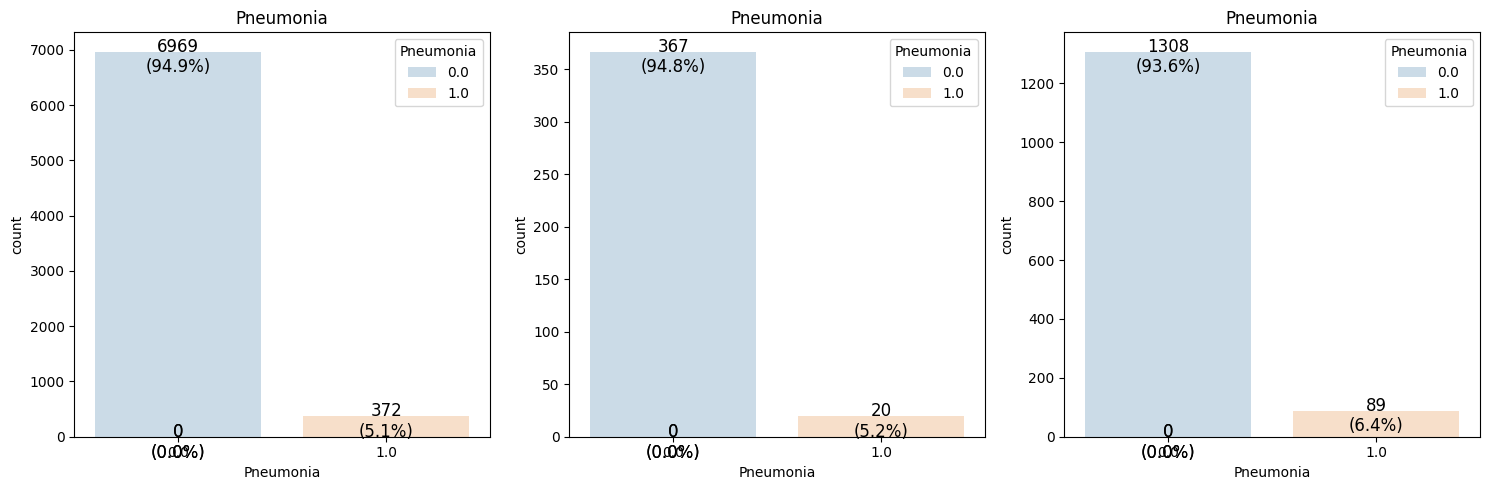

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = get_colors(2)
plot_categorical(df_train_merged[selected_columns], 'Pneumonia', axs[0], colors, total_count=len(df_train_merged))
plot_categorical(df_val_merged[selected_columns], 'Pneumonia', axs[1], colors, total_count=len(df_val_merged))
plot_categorical(df_test_merged[selected_columns], 'Pneumonia', axs[2], colors, total_count=len(df_test_merged))
plt.tight_layout()

In [29]:
df_train_merged[selected_columns[:-1]]

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.034109,0.017079,0.004292,-0.005805,-0.011792,0.016087,-0.044040,0.030857,0.021916,-0.002994,...,0.024687,-0.030444,0.003069,-0.055603,-0.003481,0.004572,-0.014521,-0.029270,-0.010988,0.063009
1,-0.028804,0.008178,0.031289,-0.007537,-0.013705,0.006817,-0.026754,0.020233,0.008218,-0.012968,...,0.027162,-0.041601,-0.000895,-0.041030,-0.003012,0.000055,-0.023444,-0.022683,-0.012469,0.065280
2,-0.018501,0.007460,-0.005905,0.015641,-0.013358,0.025414,-0.035285,0.025955,0.037420,0.003082,...,0.031814,-0.035963,-0.010607,-0.047651,0.009997,0.009302,-0.014764,-0.008199,-0.022131,0.054052
3,-0.036802,0.023041,0.010568,0.005678,-0.008561,0.005237,-0.034171,0.026495,0.005378,-0.003336,...,0.007634,-0.040367,0.004174,-0.046368,0.004639,-0.004564,-0.019701,-0.035018,-0.017919,0.050189
4,-0.025032,0.011073,0.015010,0.006610,-0.012990,0.017124,-0.032390,0.011778,0.007015,-0.014957,...,0.014459,-0.038117,-0.009935,-0.033321,0.013490,-0.002956,-0.031113,-0.016274,-0.034960,0.039006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7336,-0.038267,-0.003652,0.015225,0.005635,-0.014361,0.019340,-0.045470,0.027854,0.015990,-0.004855,...,0.021450,-0.023695,-0.026113,-0.058597,0.027368,-0.004179,-0.013916,-0.026958,-0.006002,0.074117
7337,-0.018308,0.016753,0.003402,-0.005012,-0.034752,0.025244,-0.037582,0.021047,0.024061,-0.000138,...,0.027761,-0.023388,-0.005845,-0.043216,0.018814,-0.008668,-0.031421,-0.017828,0.002581,0.044911
7338,-0.020133,0.017257,0.003110,-0.000662,-0.001695,0.010569,-0.026790,0.021161,0.008934,-0.009593,...,0.011232,-0.037526,-0.002146,-0.039572,0.006642,0.004156,-0.011603,-0.011296,-0.021053,0.050128
7339,-0.004664,0.003285,-0.000506,-0.006361,-0.049047,0.007075,-0.024597,0.023800,0.038644,0.009907,...,0.043060,-0.027500,-0.013324,-0.037240,0.031521,-0.016043,0.019190,-0.017965,-0.000011,0.021069


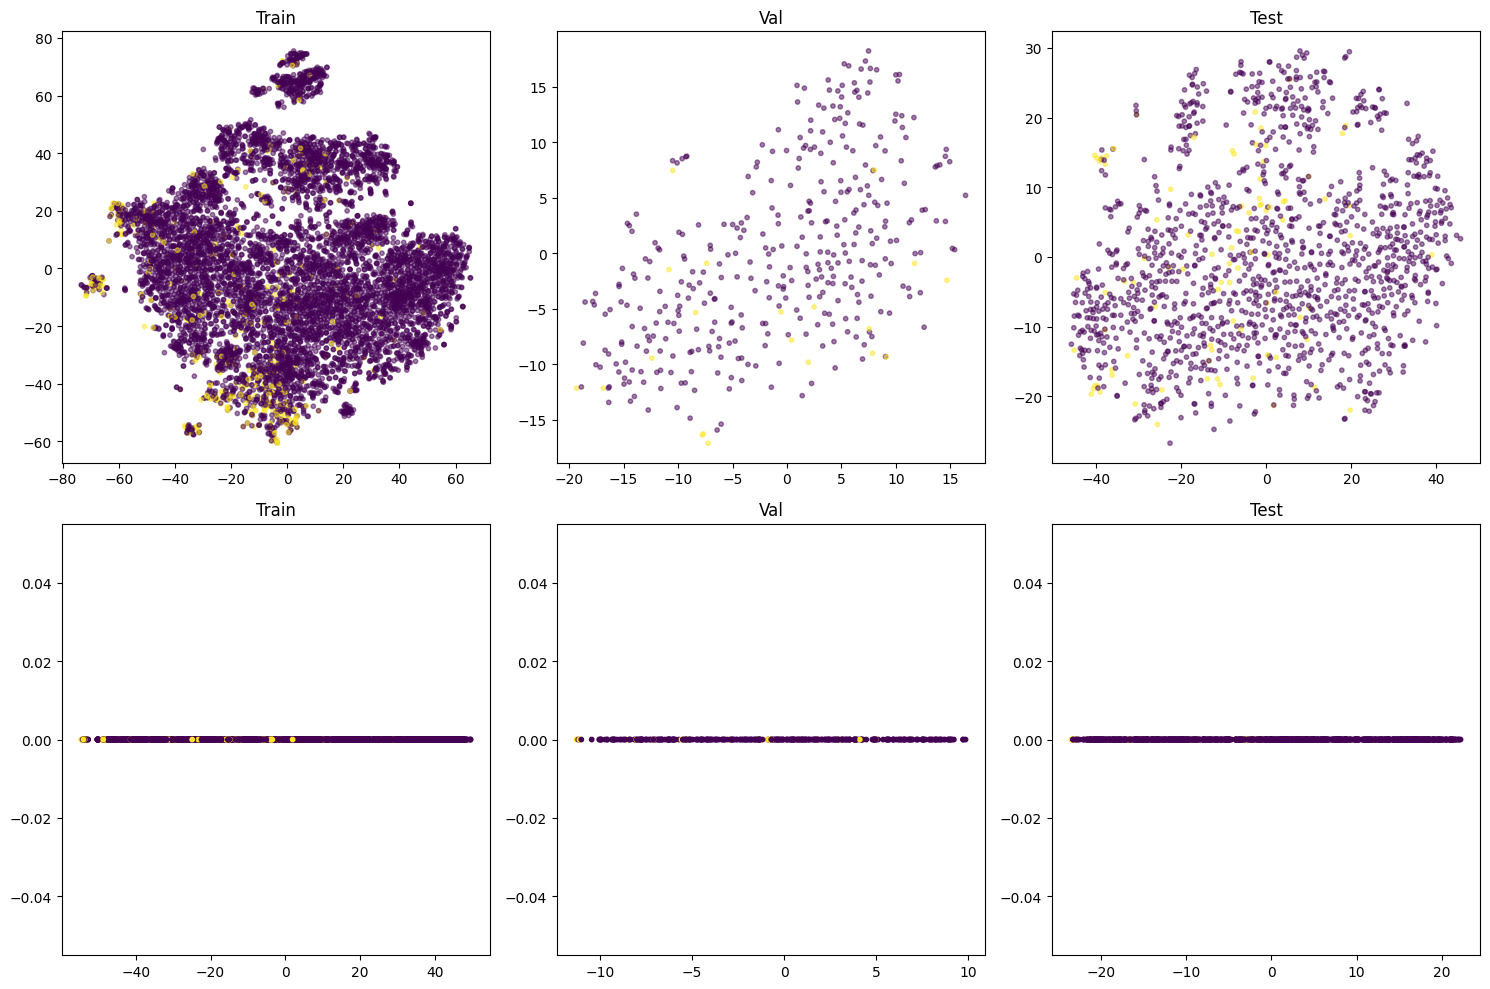

In [35]:
# Create tsne plot for the embeddings
from sklearn.manifold import TSNE
# extract columns with name 0-1024 and pneumonia

def plot_tsne(df, ax, title):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, :-1])
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10, alpha=0.5)
    ax.set_title(title)

def plot_tsne_1d(df, ax, title):
    tsne = TSNE(n_components=1, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, :-1])
    ax.scatter(X_2d, np.zeros_like(X_2d), c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(title)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
plot_tsne(df_train_merged[selected_columns], axs[0], 'Train')
plot_tsne(df_val_merged[selected_columns], axs[1], 'Val')
plot_tsne(df_test_merged[selected_columns], axs[2], 'Test')

plot_tsne_1d(df_train_merged[selected_columns], axs[3], 'Train')
plot_tsne_1d(df_val_merged[selected_columns], axs[4], 'Val')
plot_tsne_1d(df_test_merged[selected_columns], axs[5], 'Test')


plt.tight_layout()
plt.show()

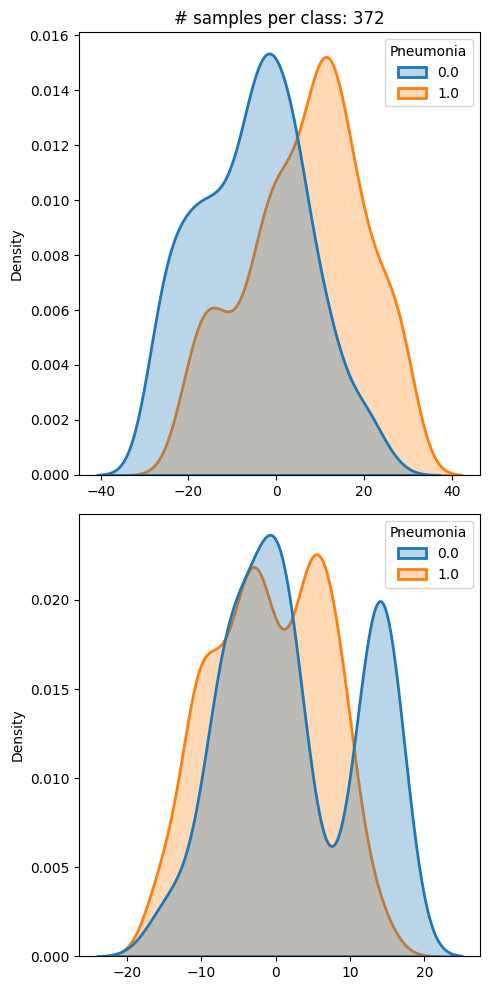

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

# Function to plot t-SNE with marginal distributions for one dimension
def plot_tsne_with_marginals(df, ax, label):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, 0:-1])  # Apply t-SNE to features
    # Scatter plot of the t-SNE 2D projections
    ax.set_title(f'# samples per class: {int(len(df)/2)}')
    # Marginal distribution for the first dimension of t-SNE (X-axis)
    sns.kdeplot(x=X_2d[:, 0], hue=df[label], ax=ax, fill=True, alpha=0.3, linewidth=2)

def plot_tsne_marginals_1d(df, ax, label):
    tsne = TSNE(n_components=1, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, 0:-1])  # Apply t-SNE to features
    # Scatter plot of the t-SNE 2D projections
#    ax.set_title(f'# samples per class: {int(len(df)/2)}')
    # Marginal distribution for the first dimension of t-SNE (X-axis)
    sns.kdeplot(x=X_2d[:, 0], hue=df[label], ax=ax, fill=True, alpha=0.3, linewidth=2)

fig, axs = plt.subplots(2, 1, figsize=(5, 10))

# Plot t-SNE with marginal distributions for Train, Validation, and Test
plot_tsne_with_marginals(df_train_merged[selected_columns], axs[0], 'Pneumonia')
plot_tsne_marginals_1d(df_train_merged[selected_columns], axs[1], 'Pneumonia')

plt.tight_layout()
plt.show()


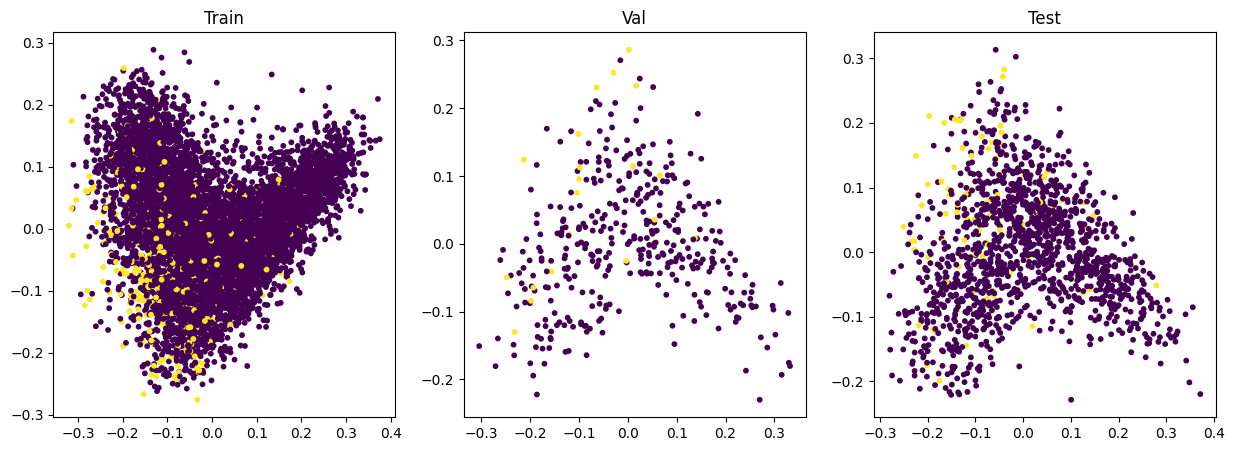

In [39]:
# create PCA plot for the embeddings
from sklearn.decomposition import PCA

def plot_pca(df, ax, title):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(df.iloc[:, 0:-1])
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_pca(df_train_merged[selected_columns], axs[0], 'Train')
plot_pca(df_val_merged[selected_columns], axs[1], 'Val')
plot_pca(df_test_merged[selected_columns], axs[2], 'Test')


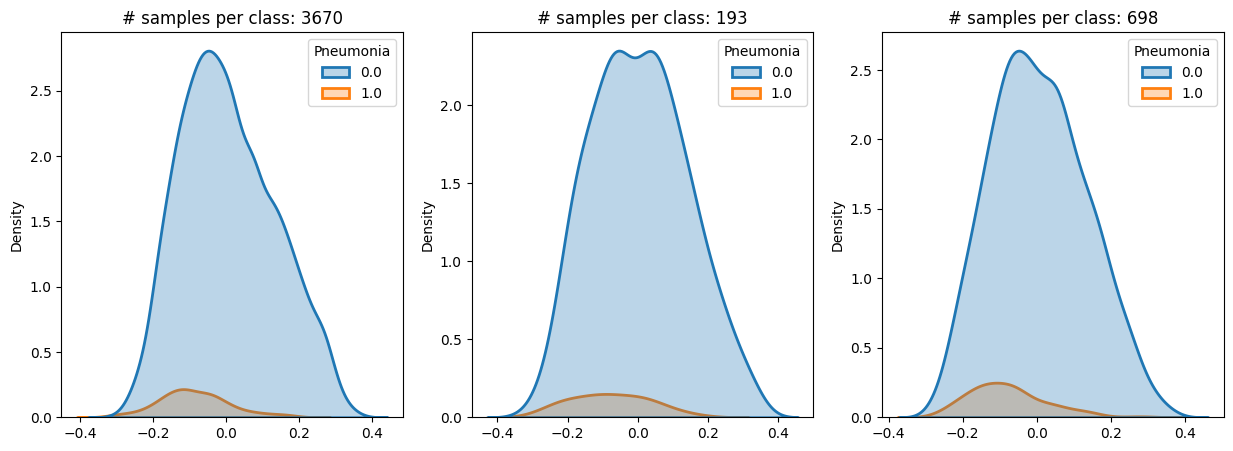

In [40]:
def plot_pca_with_marginals(df, ax, title):
    pca = PCA(n_components=1)
    X_2d = pca.fit_transform(df.iloc[:, :-1])  # Apply PCA to features
    ax.set_title(f'# samples per class: {int(len(df)/2)}')
    sns.kdeplot(x=X_2d[:, 0], hue=df['Pneumonia'], ax=ax, fill=True, alpha=0.3, linewidth=2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot PCA with marginal distributions for Train, Validation, and Test
plot_pca_with_marginals(df_train_merged[selected_columns], axs[0], 'Train - PCA')
plot_pca_with_marginals(df_val_merged[selected_columns], axs[1], 'Val - PCA')
plot_pca_with_marginals(df_test_merged[selected_columns], axs[2], 'Test - PCA')



# Balanced

In [45]:
pneumonia_count = df_train_merged["Pneumonia"].value_counts()[1]
df_train_merged = pd.concat([df_train_merged[df_train_merged["Pneumonia"] == 0].sample(n=pneumonia_count, random_state=42), df_train_merged[df_train_merged["Pneumonia"] == 1]])
pneumonia_count = df_test_merged["Pneumonia"].value_counts()[1]
df_test_merged = pd.concat([df_test_merged[df_test_merged["Pneumonia"] == 0].sample(n=pneumonia_count, random_state=42), df_test_merged[df_test_merged["Pneumonia"] == 1]])
pneumonia_count = df_val_merged["Pneumonia"].value_counts()[1]
df_val_merged = pd.concat([df_val_merged[df_val_merged["Pneumonia"] == 0].sample(n=pneumonia_count, random_state=42), df_val_merged[df_val_merged["Pneumonia"] == 1]])

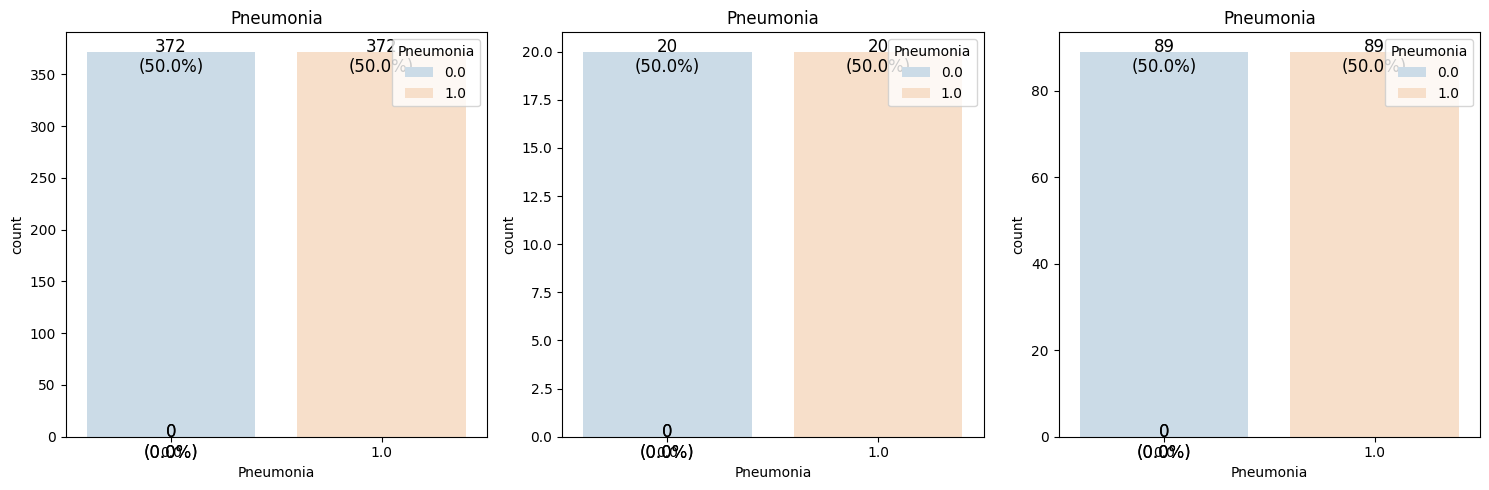

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = get_colors(2)
plot_categorical(df_train_merged[selected_columns], 'Pneumonia', axs[0], colors, total_count=len(df_train_merged))
plot_categorical(df_val_merged[selected_columns], 'Pneumonia', axs[1], colors, total_count=len(df_val_merged))
plot_categorical(df_test_merged[selected_columns], 'Pneumonia', axs[2], colors, total_count=len(df_test_merged))
plt.tight_layout()

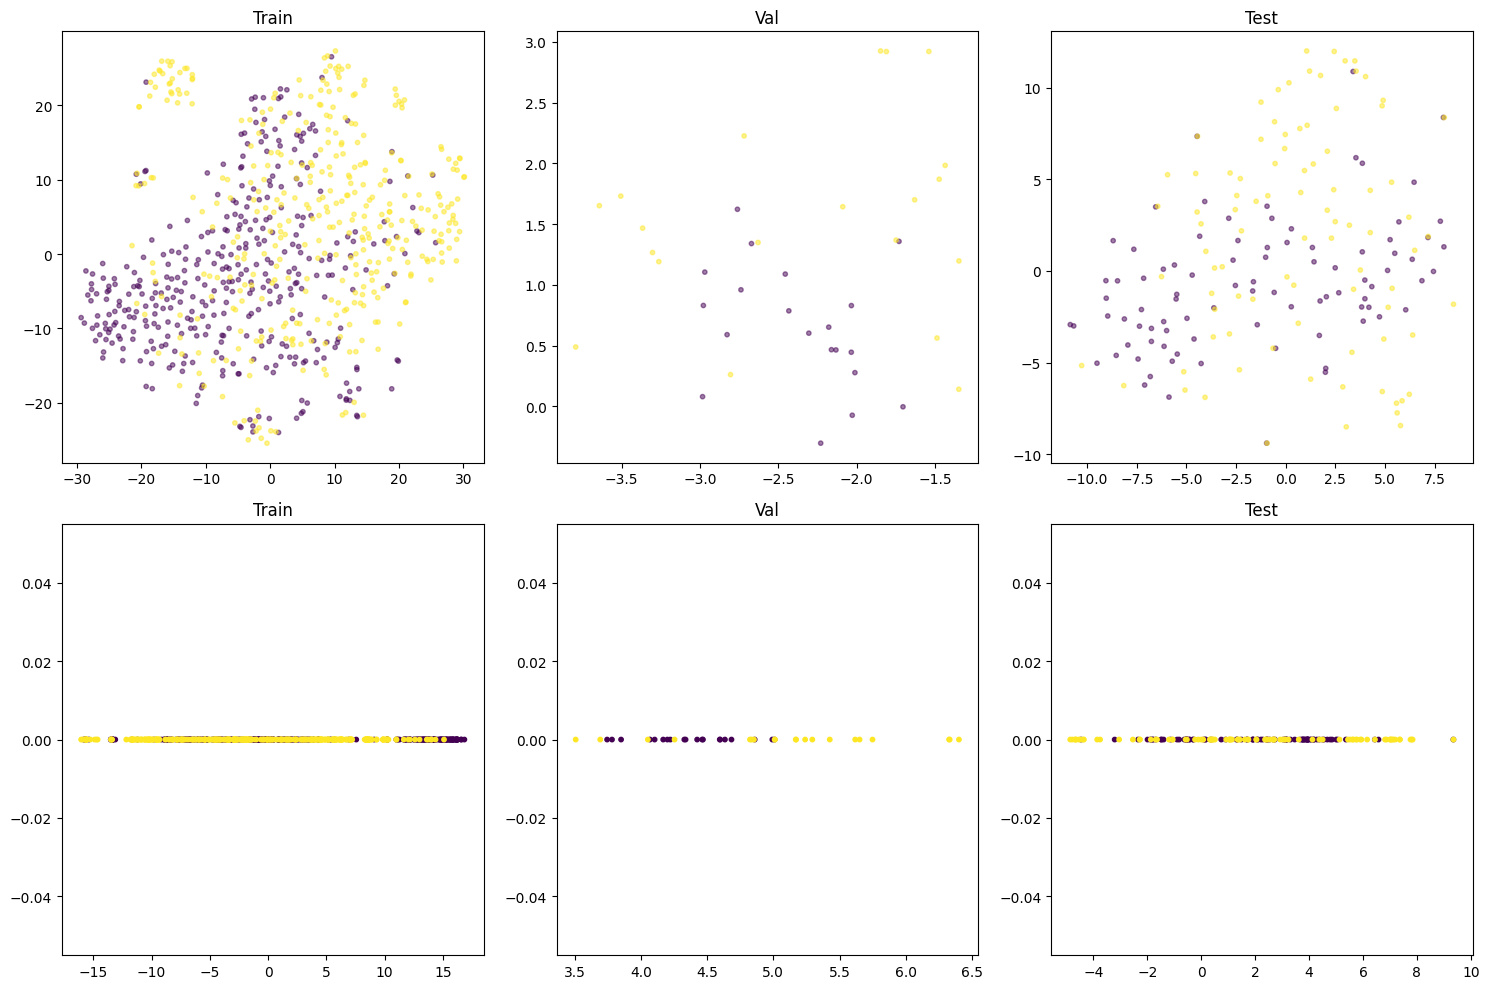

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
plot_tsne(df_train_merged[selected_columns], axs[0], 'Train')
plot_tsne(df_val_merged[selected_columns], axs[1], 'Val')
plot_tsne(df_test_merged[selected_columns], axs[2], 'Test')

plot_tsne_1d(df_train_merged[selected_columns], axs[3], 'Train')
plot_tsne_1d(df_val_merged[selected_columns], axs[4], 'Val')
plot_tsne_1d(df_test_merged[selected_columns], axs[5], 'Test')


plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

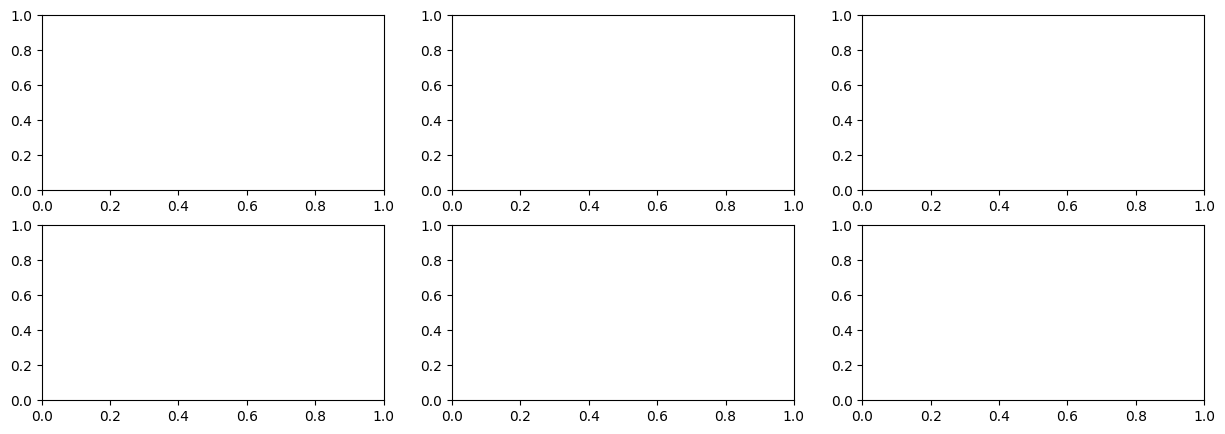

In [56]:
# Create subplots for t-SNE plots with marginal distributions for the first t-SNE dimension
fig, axs = plt.subplots(2, 3, figsize=(15, 5))

# Plot t-SNE with marginal distributions for Train, Validation, and Test
plot_tsne_with_marginals(df_train_merged[selected_columns], axs[0], 'Pneumonia')
plot_tsne_with_marginals(df_val_merged[selected_columns], axs[1], 'Pneumonia')
plot_tsne_with_marginals(df_test_merged[selected_columns], axs[2], 'Pneumonia')

plot_tsne_marginals_1d(df_train_merged[selected_columns], axs[3], 'Pneumonia')
plot_tsne_marginals_1d(df_val_merged[selected_columns], axs[4], 'Pneumonia')
plot_tsne_marginals_1d(df_test_merged[selected_columns], axs[5], 'Pneumonia')


# Optional: Add a color bar for the scatter plot
#fig.colorbar(scatter_train, ax=axs, orientation='vertical', label='Pneumonia')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

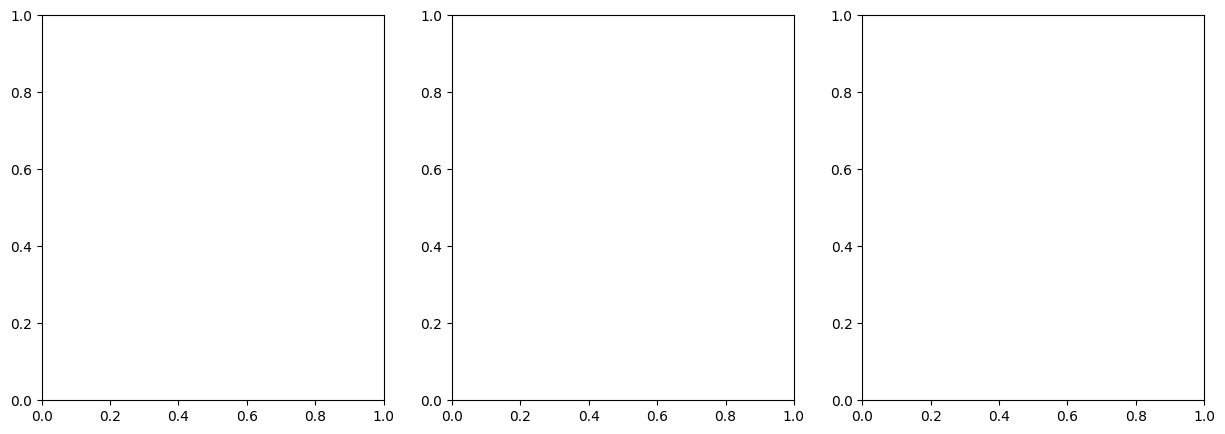

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_pca(df_train_merged[selected_columns], axs, 'Train')
plot_pca(df_val_merged[selected_columns], axs, 'Val')
plot_pca(df_test_merged[selected_columns], axs, 'Test')



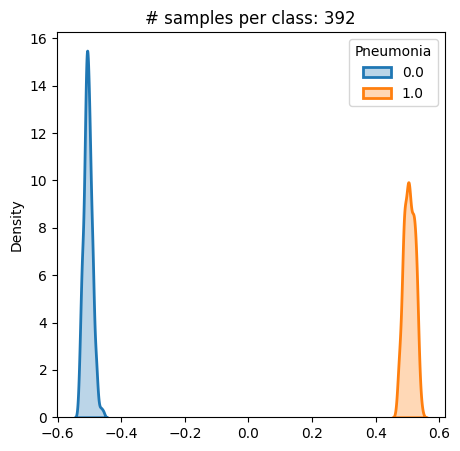

In [24]:
# Create subplots for PCA plots with marginal distributions for the first PCA dimension
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot PCA with marginal distributions for Train, Validation, and Test
plot_pca_with_marginals(df_train_merged[selected_columns], axs, 'Train - PCA')